In [29]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv('Fake_Real_Data.csv')

In [6]:
data[:5]

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [7]:
data.shape

(9900, 2)

In [9]:
data.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [10]:
data['map_label']=data.label.map({'Fake':0, 'Real':1})

In [12]:
data[:5]

,Text,label,map_label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [14]:
import spacy

In [15]:
nlp=spacy.load('en_core_web_lg')

In [19]:
data['vector']=data['Text'].apply(lambda text: nlp(text).vector)

In [21]:
data[:5]

,Text,label,map_label,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


In [25]:
data.vector

0       [-0.6759837, 1.4263071, -2.318466, -0.451093, ...
1       [-1.8355803, 1.3101058, -2.4919677, 1.0268308,...
2       [-1.9851209, 0.14389805, -2.4221718, 0.9133005...
3       [-2.7812982, -0.16120885, -1.609772, 1.3624227...
4       [-2.2010763, 0.9961637, -2.4088492, 1.128273, ...
                              ...                        
9895    [-1.6682401, 0.78006977, -2.2337353, -0.159771...
9896    [-1.9297235, 0.8007302, -1.8990824, 0.42668718...
9897    [-1.5289013, 1.0250993, -1.9861357, 0.4278564,...
9898    [-1.3928099, 0.7792715, -2.2072845, 0.13192406...
9899    [-1.5856593, -0.31769615, -0.9302766, 0.330447...
Name: Text, Length: 9900, dtype: object

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(
    data.vector.values,
    data.map_label,
    test_size=0.2,
    random_state=2024
)

In [42]:
X_train.shape

(7920,)

In [43]:
type(X_train)

numpy.ndarray

In [44]:
X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)

In [45]:
print(type(X_train_2d))
print(X_train_2d.shape)

<class 'numpy.ndarray'>
(7920, 300)


In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

model=MultinomialNB()

scalar=MinMaxScaler()
X_train_scaled=scalar.fit_transform(X_train_2d)
X_test_scaled=scalar.transform(X_test_2d)

model.fit(X_train_scaled,Y_train)


MultinomialNB()

In [57]:
Y_pred=model.predict(X_test_scaled)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1003
           1       0.94      0.95      0.94       977

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980



In [59]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()

model.fit(X_train_2d,Y_train)

Y_pred=model.predict(X_test_2d)

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1003
           1       0.99      0.99      0.99       977

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[994,   9],
       [  5, 972]], dtype=int64)

Text(20.72222222222222, 0.5, 'Truth')

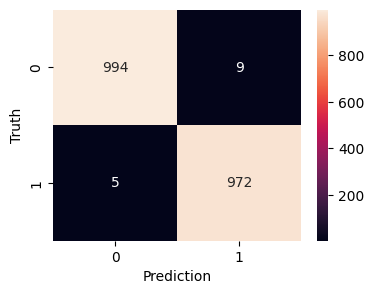

In [63]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (4,3))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')